In [1]:
import os

In [2]:
def extract_data(root):
    result_dict = {}  # Create an empty dictionary to store the results
    # Walk through all directories and subdirectories
    for folder, subdirs, files in os.walk(root):
        if os.path.basename(folder).startswith("o3cpu") and "state" not in os.path.basename(folder) and "2000tries" not in os.path.basename(folder):
            # Check if 'terminaloutput.txt' is not in the list of files in the folder
            if "terminaloutput.txt" in files or "terminaloutput.txt" not in files:
                # open the "stats.txt" file and read the last line
                with open(os.path.join(folder, "stats.txt")) as f:
                    overallMisses = 0
                    # read all lines into a list
                    lines = f.readlines()
                    for line in lines:
                        if "simSeconds" in line:
                            # extract the simSeconds value from the line
                            simSeconds = float(line.split()[1])
                        if "system.cpu.numCycles" in line:
                            # extract the numCycles value from the line
                            numCycles = int(line.split()[1])
                        if "system.cpu.branchPred.condPredicted" in line:
                            # extract the conditional predicted branches value from the line
                            condPredicted = int(line.split()[1])
                        if "system.cpu.branchPred.condIncorrect" in line:
                            # extract the conditional incorrect branches value from the line
                            condIncorrect = int(line.split()[1])
                        if "system.cpu.commit.branchMispredicts" in line:
                            # extract the branch mispredicts value from the line
                            branchMispredicts = int(line.split()[1])
                        if "overallMisses::total" in line:
                            # extract the overall misses value from the line
                            overallMisses += int(line.split()[1])
                result_dict[os.path.basename(folder)] = {"Seconds": simSeconds, "Cycles": numCycles, "Conditional Predicted": condPredicted,
                                                         "Conditional Incorrect": condIncorrect, "Branch Mispredicts": branchMispredicts,
                                                         "Overall Cache Misses": overallMisses}  # Create an empty dictionary for the folder

    return result_dict

In [3]:
data = extract_data(".")

# print data in a table
print("Branch Predictor\tSeconds\t\tCycles\t\tConditional Predicted\tConditional Incorrect\tBranch Mispredicts\tOverall Cache Misses")
for key, value in data.items():
    print("{}\t\t{}\t\t{}\t\t{}\t\t\t\t{}\t\t\t\t{}\t\t\t\t{}".format(" ".join(key.split("-")[2:]), value["Seconds"], value["Cycles"], value["Conditional Predicted"],
                                                                         value["Conditional Incorrect"], value["Branch Mispredicts"],
                                                                         value["Overall Cache Misses"]))

Branch Predictor	Seconds		Cycles		Conditional Predicted	Conditional Incorrect	Branch Mispredicts	Overall Cache Misses
bimodebp		0.008116		8116133		857885				6890				6308				56763
localBP		0.008116		8116491		863387				7684				7302				56884
ltage		0.567366		567365605		50246568				41038				40579				3898824
multiperspective perceptron 64KB		3.019915		3019915267		275222893				3325693				3325101				19507590
multiperspective perceptron 8KB		0.240178		240177980		22681575				114187				113674				1637081
multiperspective perceptron tage 64kb		2.068201		2068200769		186528069				791390				743424				14107147
multiperspective perceptron tage 8kb		1.888016		1888016027		170538832				732909				688196				12821993
TAGE		0.008017		8016975		815200				2685				2224				56570
tage sc l 64kb		2.197581		2197580504		195777696				771585				771121				14925645
tage sc l 8kb		2.100039		2100038862		191772063				765089				764627				14304415
tournamentBP		0.022431		22430566		2195718				10817				10356				154371


In [4]:
def plot(xvalues, yvalues, title):
    import matplotlib.pyplot as plt
    import numpy as np
    import plotly.graph_objects as go
    from plotly.offline import iplot
    from plotly.offline import plot
    import plotly.tools as tls
    import os

    if not os.path.exists("graph_output"):
        os.mkdir("graph_output")
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    print(xvalues)

    xticks = {
        'o3cpu-spectre-tage-sc-l-64kb': "TAGE SC L 64KB",
        'o3cpu-spectre-localBP': "Local BP",
        'o3cpu-spectre-multiperspective-perceptron-8KB': "MPP 8KB",
        'o3cpu-spectre-multiperspective-perceptron-tage-64kb' : "MPP TAGE 64KB",
        'o3cpu-spectre-ltage': "LTAGE",
        'o3cpu-spectre-multiperspective-perceptron-64KB' : "MPP 64KB",
        'o3cpu-spectre-bimodebp': "BiMode BP",
        'o3cpu-spectre-tournamentBP' : "Tournament BP",
        'o3cpu-spectre-multiperspective-perceptron-tage-8kb': "MPP TAGE 8KB",
        'o3cpu-spectre-TAGE': "TAGE",
        'o3cpu-spectre-tage-sc-l-8kb': "TAGE SC L 8KB",
    }

    ax.bar(np.arange(len(xvalues)), yvalues, width=0.8, color="blue", align="center")
    ax.set_xticks(np.arange(len(xvalues)))
    # set xticks to the branch predictor names
    ax.set_xticklabels([xticks[x] for x in xvalues], rotation=90)
    # ax.set_xticklabels(xvalues, rotation=90)
    ax.set_ylabel(title)
    ax.set_xlabel("Branch Predictors")
    ax.set_title(title + " for Each Branch Predictor")

    for i, value in enumerate(yvalues):
        if value > 10000:
            # make text scientific notation and reduce font size
            ax.text(i, value, "{:.1e}".format(value), ha='center', va='bottom', fontsize=8)
        else:
            # reduce to 2 decimal places only if value is greater than 0.01
            if value > 0.01:
                value = round(value, 2)
            ax.text(i, value, str(value), ha='center', va='bottom')

    plt.savefig(title + ".png", bbox_inches="tight")
    plt.show()
    plotly_fig = tls.mpl_to_plotly(ax.figure)
    
    #iplot(plotly_fig)
    
    colors = "Blue"
    pfig = go.Figure(data=[go.Bar(x=[xticks[x] for x in xvalues],y=yvalues,text=[f'{val:.2e}' for val in yvalues],textposition="outside", marker_color=colors)])
    
    #t = {family = "Open Sans", size = 14,color = 'blue'}
    pfig.update_layout(width=900,height=900,title=title + " for Each Benchmark", xaxis_title="Branch Predictors", yaxis_title=title, font=dict(family="Sans-Serif", size=16) )
    pfig.update_yaxes(tickformat=".2e")
    output_file_name = "graph_output/" + title + ".png"
    pfig.write_image(output_file_name)
    pfig.show()



In [5]:
# Create a list of the branchpredictors names
branchpredictors = []
for key, value in data.items():
    branchpredictors.append(key)
    # # if data length is more than 3, then take every value from the 2nd and join them with a hyphen
    # # also capitalize the first letter of each word
    # if len(key.split("-")) > 3:
    #     branchpredictors.append(" ".join(key.split("-")[2:]).title())
    # else:
    #     # if bp is in the branchpredictors name, then remove it and capitalize the first letter of each word
    #     # not case sensitive
    #     if "bp" in key.split("-")[2] or "BP" in key.split("-")[2]:
    #         # remove the "bp" from the branchpredictors name and capitalize the first letter of each word
    #         branchpredictors.append(key.split("-")[2].replace("bp", "").replace("BP", "").title())
    #     else:
    #         branchpredictors.append(key.split("-")[2].title())

# Create a list of the number of cycles
cycles = []
for key, value in data.items():
    cycles.append(value["Cycles"])

# Create a list of the number of seconds
seconds = []
for key, value in data.items():
    seconds.append(value["Seconds"])

# Create a list of the number of conditional predicted branches
condPredicted = []
for key, value in data.items():
    condPredicted.append(value["Conditional Predicted"])

# Create a list of the number of conditional incorrect branches
condIncorrect = []
for key, value in data.items():
    condIncorrect.append(value["Conditional Incorrect"])

# Create a list of the number of branch mispredicts
branchMispredicts = []
for key, value in data.items():
    branchMispredicts.append(value["Branch Mispredicts"])

# Create a list of the number of overall cache misses
overallMisses = []
for key, value in data.items():
    overallMisses.append(value["Overall Cache Misses"])

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


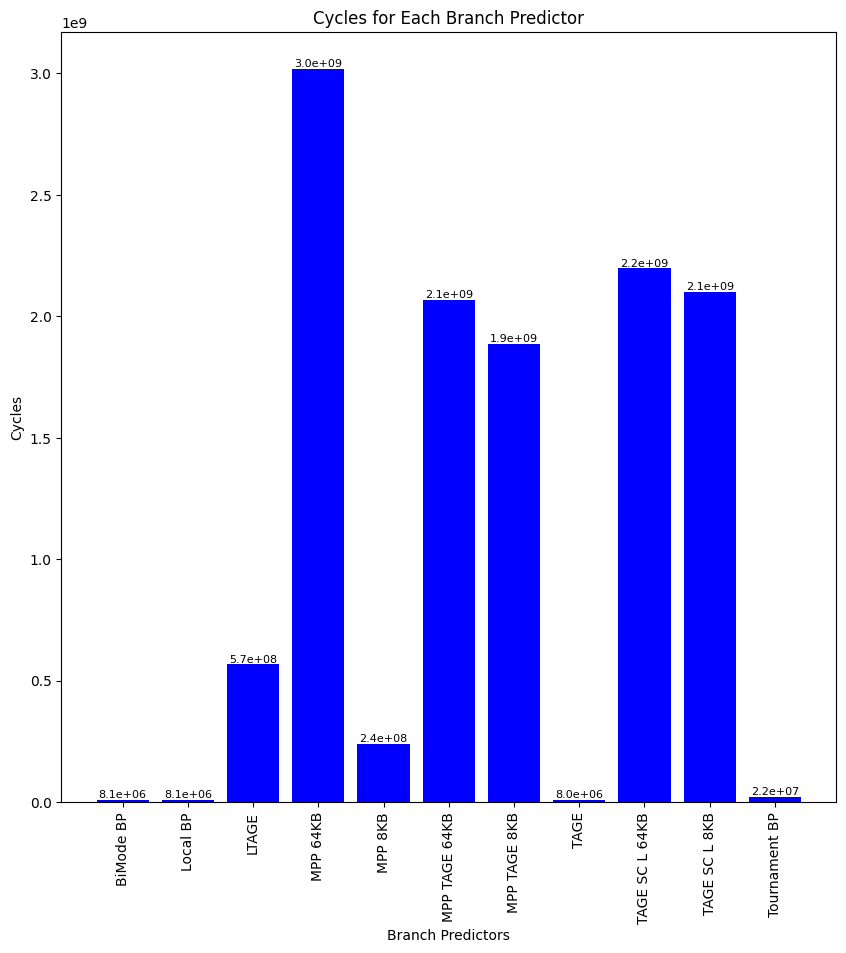

C:\Users\anime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\matplotlylib\renderer.py:645: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



In [6]:
plot(branchpredictors, cycles, "Cycles")

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


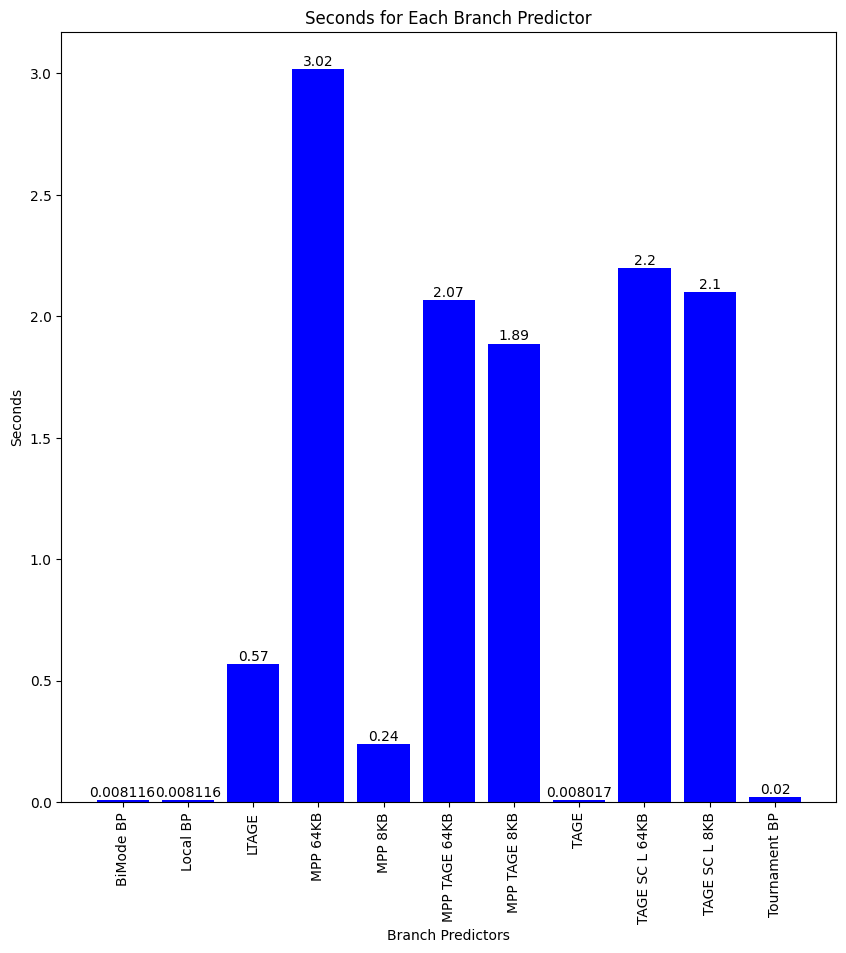

In [7]:
plot(branchpredictors, seconds, "Seconds")

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


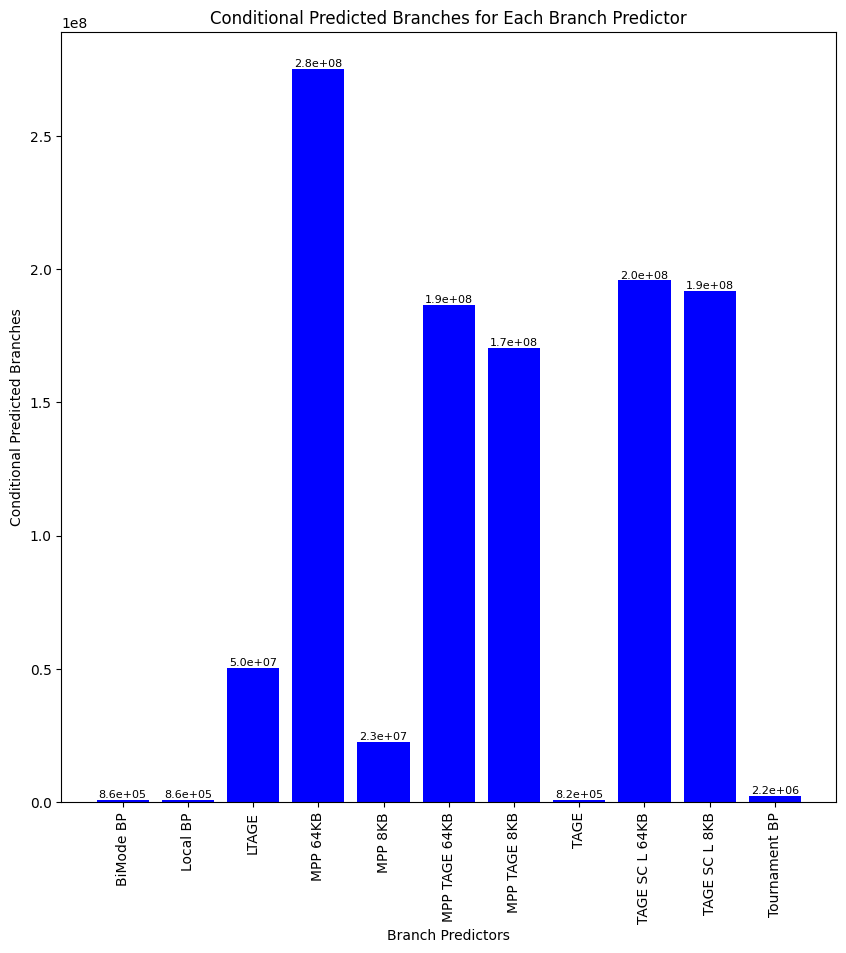

In [8]:
plot(branchpredictors, condPredicted, "Conditional Predicted Branches")

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


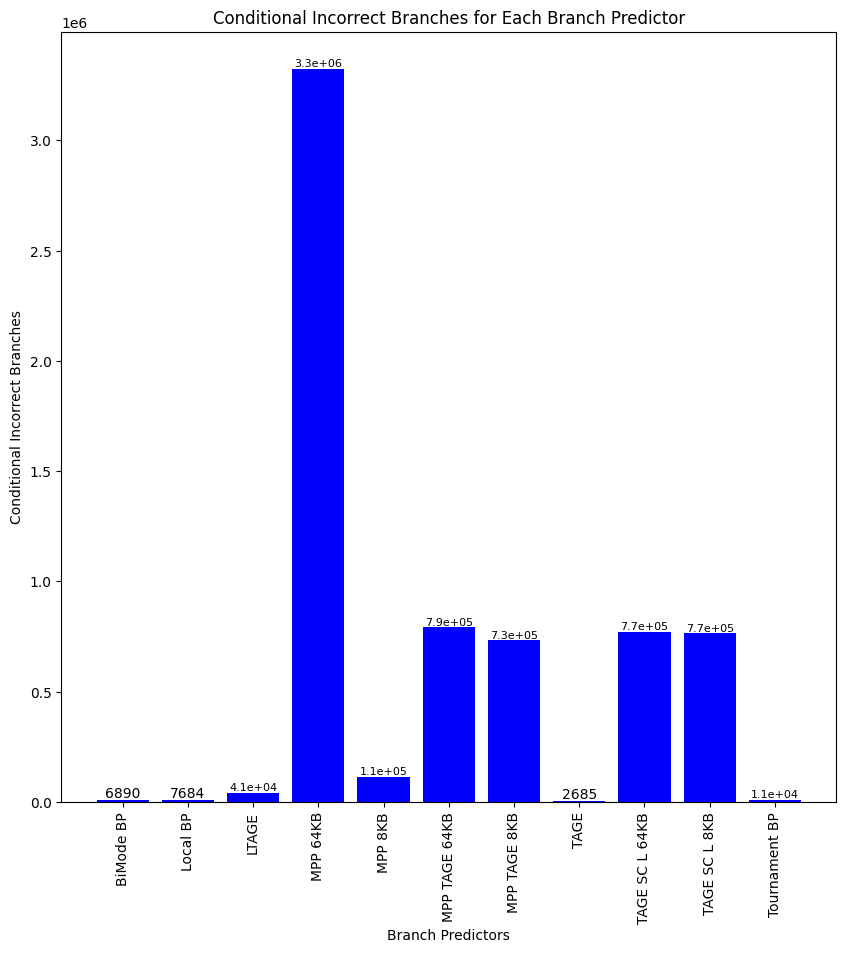

In [9]:
plot(branchpredictors, condIncorrect, "Conditional Incorrect Branches")

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


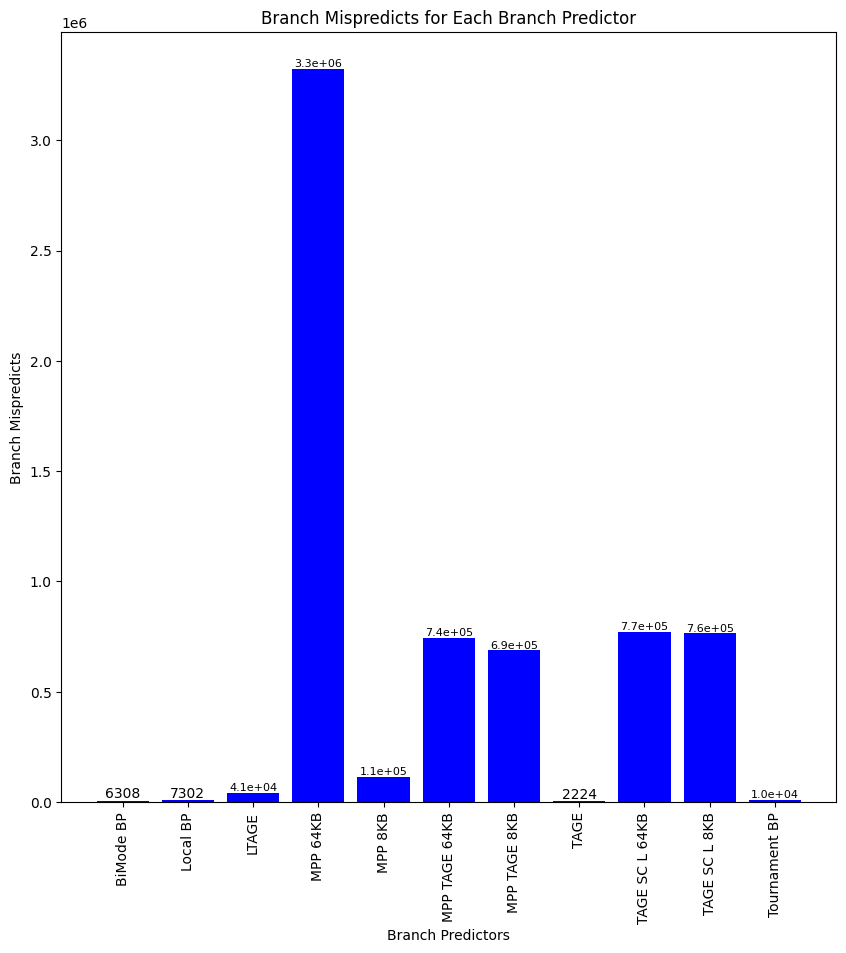

In [10]:
plot(branchpredictors, branchMispredicts, "Branch Mispredicts")

3.9.13
['o3cpu-spectre-bimodebp', 'o3cpu-spectre-localBP', 'o3cpu-spectre-ltage', 'o3cpu-spectre-multiperspective-perceptron-64KB', 'o3cpu-spectre-multiperspective-perceptron-8KB', 'o3cpu-spectre-multiperspective-perceptron-tage-64kb', 'o3cpu-spectre-multiperspective-perceptron-tage-8kb', 'o3cpu-spectre-TAGE', 'o3cpu-spectre-tage-sc-l-64kb', 'o3cpu-spectre-tage-sc-l-8kb', 'o3cpu-spectre-tournamentBP']


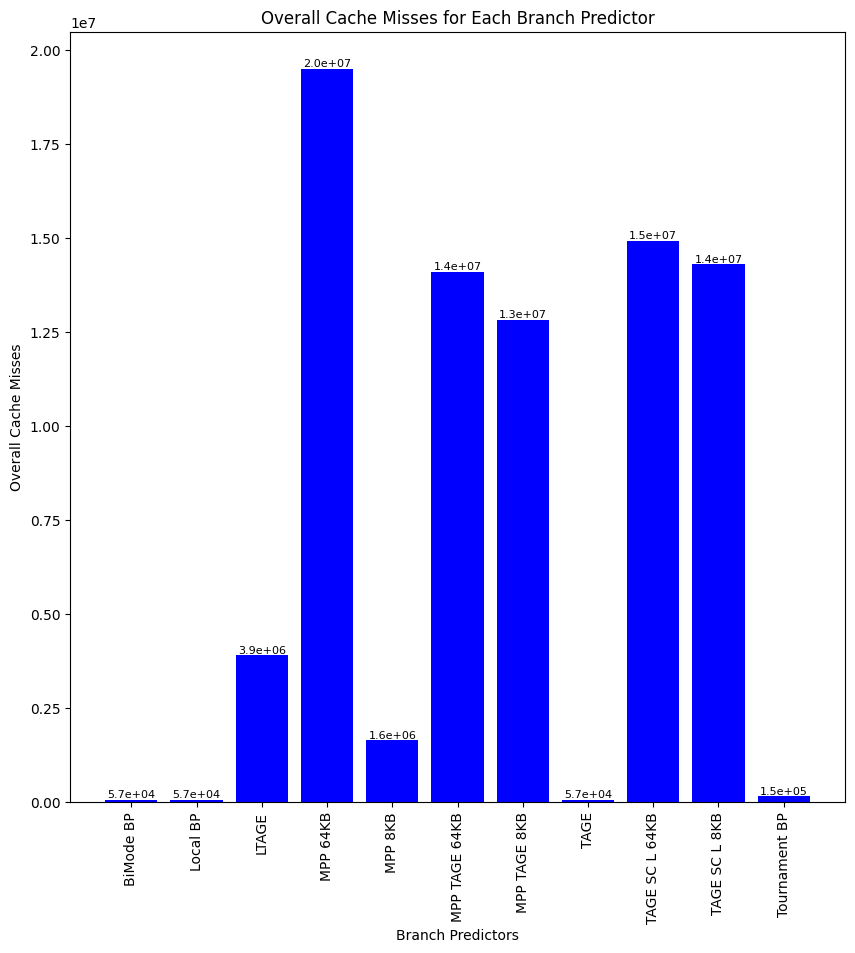

In [11]:
plot(branchpredictors, overallMisses, "Overall Cache Misses")

In [12]:
import pickle

# Load the variable from the file
with open('more_iters_data.pkl', 'rb') as f:
    more_iters_data = pickle.load(f)


In [13]:
# create a dataframe from the data
import pandas as pd
df1 = pd.DataFrame.from_dict(data, orient="index")

# join df1 with more_iters_data with suffixes for the same columns
df = df1.join(more_iters_data, lsuffix="_def", rsuffix="_2000tries")


print(df.columns)




Index(['Seconds_def', 'Cycles_def', 'Conditional Predicted_def',
       'Conditional Incorrect_def', 'Branch Mispredicts_def',
       'Overall Cache Misses_def', 'Seconds_2000tries', 'Cycles_2000tries',
       'Conditional Predicted_2000tries', 'Conditional Incorrect_2000tries',
       'Branch Mispredicts_2000tries', 'Overall Cache Misses_2000tries'],
      dtype='object')


In [175]:
def plot_grouped_bar_chart(dataframe, stat, y_limit=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import plotly.graph_objects as go
    from plotly.offline import iplot
    from plotly.offline import plot
    import plotly.tools as tls
    import os

    if not os.path.exists("graph_output"):
        os.mkdir("graph_output")
    stats_def = f"{stat}_def"
    stats_2000tries = f"{stat}_2000tries"
    # Extract the relevant columns
    subset_data = dataframe[[stats_def, stats_2000tries]]

    xticks = {
        'o3cpu-spectre-tage-sc-l-64kb': "TAGE SC L 64KB",
        'o3cpu-spectre-localBP': "Local BP",
        'o3cpu-spectre-multiperspective-perceptron-8KB': "MPP 8KB",
        'o3cpu-spectre-multiperspective-perceptron-tage-64kb' : "MPP TAGE 64KB",
        'o3cpu-spectre-ltage': "LTAGE",
        'o3cpu-spectre-multiperspective-perceptron-64KB' : "MPP 64KB",
        'o3cpu-spectre-bimodebp': "BiMode BP",
        'o3cpu-spectre-tournamentBP' : "Tournament BP",
        'o3cpu-spectre-multiperspective-perceptron-tage-8kb': "MPP TAGE 8KB",
        'o3cpu-spectre-TAGE': "TAGE",
        'o3cpu-spectre-tage-sc-l-8kb': "TAGE SC L 8KB",
    }

    # Rename the index
    subset_data = subset_data.rename(index=xticks)

    # Create a bar chart with a wider gap between bars
    ax = subset_data.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust the width here
    ax.set_xlabel('Branch Predictors')
    ax.set_ylabel(stat)

    # Set the title and position it below the chart
    title = f'{stat} for 1000 iterations and 2000 iterations'
    ax.set_title(title)
    ax.title.set_position([0.5, 1.05])  # Adjust the y value to control the separation

    ax.legend(['Default (1000 iterations)', '2000 iterations'])
    ax.get_legend().remove()

    if y_limit is not None:
        ax.set_ylim(0, y_limit)

    for i, (index, row) in enumerate(subset_data.iterrows()):
        for j, value in enumerate(row):
            if value > 10000:
                if value > y_limit:
                    pass
                    #ax.text(i, y_limit, "{:.1e}".format(value), ha='center', va='bottom', fontsize=8)
                # else:
                #     # Format value in scientific notation and reduce font size
                #     ax.text(i + j * 0.1, value, "{:.1e}".format(value), ha='center', va='bottom', fontsize=8)
            else:
                if value > y_limit:
                    value = round(value, 2)
                    #ax.text(i, y_limit, str(value), ha='center', va='bottom')
                # else:
                #     value = round(value, 2)
                #     ax.text(i + j * 0.1, value, str(value), ha='center', va='bottom')

    plt.show()
    plotly_fig = tls.mpl_to_plotly(ax.figure)
    
    
    
    #colors = "Blue"
    #pfig = go.Figure(data=[go.Bar(x=[xticks[x] for x in xvalues],y=yvalues,text=[f'{val:.2e}' for val in yvalues],textposition="outside", marker_color=colors)])
    
    #t = {family = "Open Sans", size = 14,color = 'blue'}
    #pfig.update_layout(width=900,height=900,title=title + " for Each Benchmark", xaxis_title="Branch Predictors", yaxis_title=title, font=dict(family="Sans-Serif", size=16) )
    #pfig.update_yaxes(tickformat=".2e")
    plotly_fig.update_xaxes(labelalias={0:"BiMode BP", 1:"Local BP",2:"LTAGE",3:"MPP 64KB",4:"MPP 8KB",5:"MPP TAGE 64KB",6:"MPP TAGE 8KB",7:"TAGE",8:"TAGE SC L 64KB",9:"TAGE SC L 8KB",10:"Tournament BP"})
    y_limit_plotly = 2 
    output_file_name = "graph_output/SecondsAndIterations.png"
    
    for i, value in enumerate(plotly_fig.data[0].y):
        annotation_y = min(value, y_limit_plotly)
        plotly_fig.add_annotation(
            x=plotly_fig.data[0].x[i],
            y=min(value, y_limit_plotly),
            text=str(value),
            font=dict(
                size=8
            ),
            showarrow=True,
            yshift=2 if value < max(plotly_fig.data[0].y) else -2,  # Adjust position based on value
        )
    for i, value in enumerate(plotly_fig.data[1].y):
        plotly_fig.add_annotation(
            x=plotly_fig.data[1].x[i],
            y=min(value, y_limit_plotly),
            text=str(value),
            font=dict(
                size=8
            ),
            showarrow=True,
            yshift=10 if value < max(plotly_fig.data[1].y) else -10,  # Adjust position based on value
        )
    plotly_fig.update_layout(
        bargap=0.3,
        bargroupgap=0.2
    )
    plotly_fig.update_layout(yaxis=dict(range=[0, y_limit_plotly]),showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.8,
        xanchor="left",
        x=0.01,
        bordercolor="Black",
        borderwidth=1
    ))
    plotly_fig.data[0].name="Default (1000 Iterations)"
    plotly_fig.data[1].name="2000 Iterations"
    plotly_fig.write_image(output_file_name)
    #iplot(plotly_fig)
    plotly_fig.show()



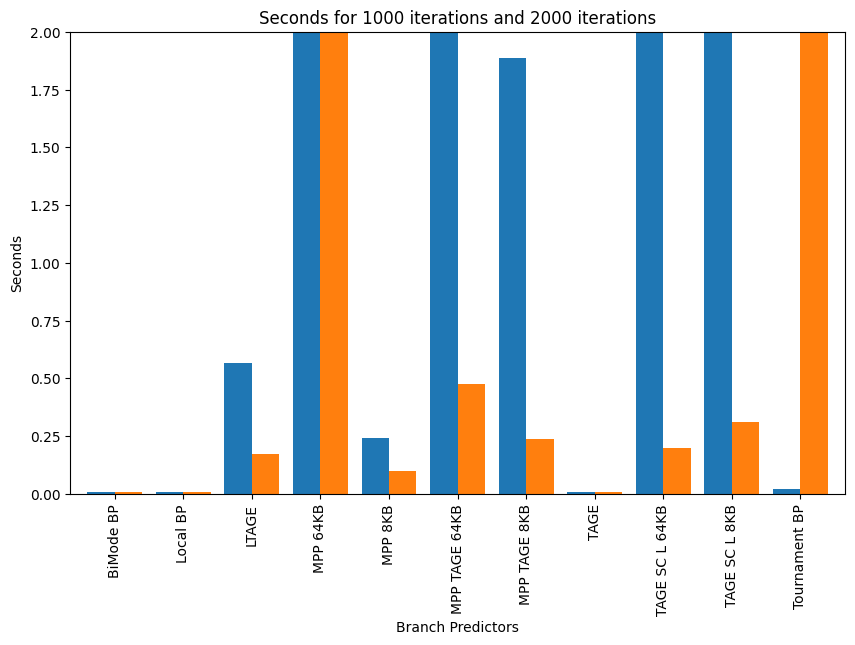

C:\Users\anime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\matplotlylib\renderer.py:645: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



In [176]:
plot_grouped_bar_chart(df, "Seconds", 2)